In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
cd /content/gdrive/MyDrive/Colab Notebooks/Script Classification


/content/gdrive/MyDrive/Colab Notebooks/Script Classification


In [5]:
# !unzip devnagri.zip


Streaming output truncated to the last 5000 lines.
  inflating: Data/Train/digit_7/10300.png  
  inflating: Data/Train/digit_7/10301.png  
  inflating: Data/Train/digit_7/10302.png  
  inflating: Data/Train/digit_7/10303.png  
  inflating: Data/Train/digit_7/10304.png  
  inflating: Data/Train/digit_7/10306.png  
  inflating: Data/Train/digit_7/10307.png  
  inflating: Data/Train/digit_7/104017.png  
  inflating: Data/Train/digit_7/104018.png  
  inflating: Data/Train/digit_7/104019.png  
  inflating: Data/Train/digit_7/104021.png  
  inflating: Data/Train/digit_7/104023.png  
  inflating: Data/Train/digit_7/104024.png  
  inflating: Data/Train/digit_7/104025.png  
  inflating: Data/Train/digit_7/104026.png  
  inflating: Data/Train/digit_7/104027.png  
  inflating: Data/Train/digit_7/104028.png  
  inflating: Data/Train/digit_7/104029.png  
  inflating: Data/Train/digit_7/104030.png  
  inflating: Data/Train/digit_7/104031.png  
  inflating: Data/Train/digit_7/104032.png  
  inflating

In [6]:
import os
from pathlib import Path
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout,Input, Add, ReLU, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

SEED = 15


In [7]:
train_dir = Path('/content/gdrive/MyDrive/Colab Notebooks/Script Classification/Data/Train')
test_dir = Path('/content/gdrive/MyDrive/Colab Notebooks/Script Classification/Data/Test')

datagen = ImageDataGenerator(rescale=1./255,
                            validation_split = 0.25,
                                    fill_mode='nearest')
Target_Size = (64,64)

# Generate Train Data
train_data = datagen.flow_from_directory(
        train_dir,
        target_size=Target_Size,
        batch_size=64,
        shuffle = True,
        subset='training',
        class_mode='categorical')

# Generate Validation data
val_data = datagen.flow_from_directory(
        train_dir,
        target_size=Target_Size,
        shuffle = True,
        batch_size=64,
        subset='validation',
        class_mode='categorical')


labels = train_data.class_indices

classes = list(labels)

X,y = next(iter(train_data))

Found 58650 images belonging to 46 classes.
Found 19550 images belonging to 46 classes.


In [10]:
# Generate Test Data
test_list = tf.io.gfile.listdir('/content/gdrive/MyDrive/Colab Notebooks/Script Classification/Data/Test/')
test_data = []
for f in test_list:
    img = tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Colab Notebooks/Script Classification/Data/Test/' + f, color_mode = "rgb", target_size = Target_Size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    test_data.append(img)

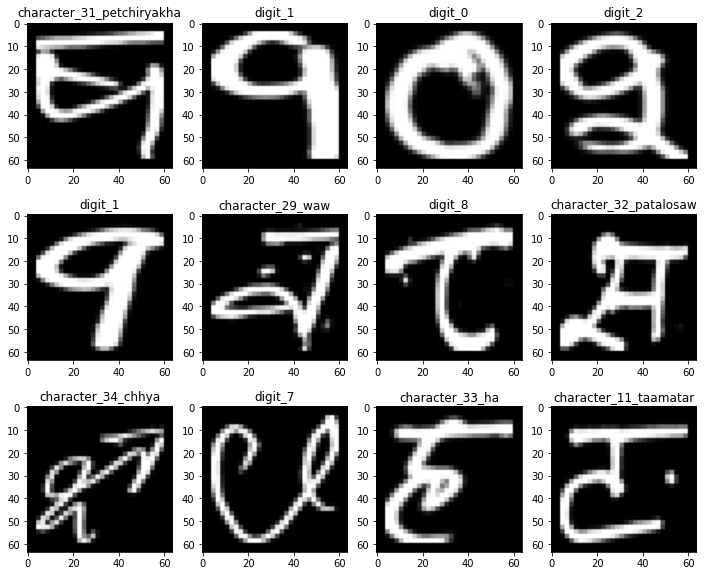

In [11]:
#plotting images of some
plt.figure(figsize = (12, 10))
for i in range(12):
    ax = plt.subplot(3,4,i+1)
    img = X[i]
    plt.imshow(img)
    plt.title(classes[y[i].argmax()])

## ResNet

In [12]:
kernel_init = tf.keras.initializers.glorot_uniform()
bias_init = tf.keras.initializers.Constant(value=0.2)

In [13]:
def model():
    
    inputs = Input(shape = (64,64,3))

    
    x = Conv2D(16, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(inputs)
    x = Conv2D(16, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)
    
    x_srt = x
    
    x = Conv2D(32, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(32, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(32, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(32, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(32, kernel_size = (7,7), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    
    x_srt = Conv2D(32, kernel_size = (5,5), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x_srt)

    x = Add()([x, x_srt])
    x = ReLU()(x)
    
    x = MaxPool2D(pool_size = (2,2), strides = 2)(x)
    
    x_srt2 = x
    
    x = Conv2D(64, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(64, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(64, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)

    
    x = Conv2D(64, kernel_size = (7,7), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    
    x_srt2 = Conv2D(64, kernel_size = (5,5), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x_srt2)

    x = Add()([x, x_srt2])
    x = ReLU()(x)
    
    x = MaxPool2D(pool_size = (2,2), strides = 2)(x)
    
    x_srt3 = x
    
    x = Conv2D(128, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(128, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(128, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(128, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)

    
    x = Conv2D(128, kernel_size = (7,7), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    
    x_srt3 = Conv2D(128, kernel_size = (5,5), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x_srt3)
    
    x = Add()([x, x_srt3])
    x = ReLU()(x)
    
    x = MaxPool2D(pool_size = (2,2), strides = 2)(x)
    
    x_srt4 = x
    
    x = Conv2D(256, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(256, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(256, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(256, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)

    
    x = Conv2D(256, kernel_size = (7,7), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)

    x_srt4 = Conv2D(256, kernel_size = (5,5), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x_srt4)
    
    x = Add()([x, x_srt4])
    x = ReLU()(x)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Flatten()(x)
    
    x = Dense(256, activation = 'relu')(x)
    outputs = Dense(46, activation = 'softmax')(x)
    
    
    model = Model(inputs = inputs, outputs = outputs)
    
    return model

In [14]:
model = model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 16)   2368        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 16)   12560       ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 16)  64          ['conv2d_1[0][0]']               
 alization)                                                                                   

In [15]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history5 = model.fit(train_data, validation_data=val_data, epochs=20, callbacks=callback, shuffle = True)

Epoch 1/20
917/917 [==============================] - 234s 239ms/step - loss: 0.7479 - accuracy: 0.7847 - val_loss: 0.5646 - val_accuracy: 0.8478
Epoch 2/20
917/917 [==============================] - 217s 236ms/step - loss: 0.1178 - accuracy: 0.9651 - val_loss: 0.3229 - val_accuracy: 0.9082
Epoch 3/20
917/917 [==============================] - 216s 236ms/step - loss: 0.0739 - accuracy: 0.9780 - val_loss: 0.3787 - val_accuracy: 0.9050
Epoch 4/20
917/917 [==============================] - 217s 236ms/step - loss: 0.0547 - accuracy: 0.9833 - val_loss: 0.2631 - val_accuracy: 0.9361
Epoch 5/20
917/917 [==============================] - 221s 241ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.3597 - val_accuracy: 0.9250
Epoch 6/20
917/917 [==============================] - 230s 250ms/step - loss: 0.0442 - accuracy: 0.9868 - val_loss: 0.2100 - val_accuracy: 0.9462
Epoch 7/20
917/917 [==============================] - 217s 236ms/step - loss: 0.0325 - accuracy: 0.9906 - val_loss: 0.4468 -

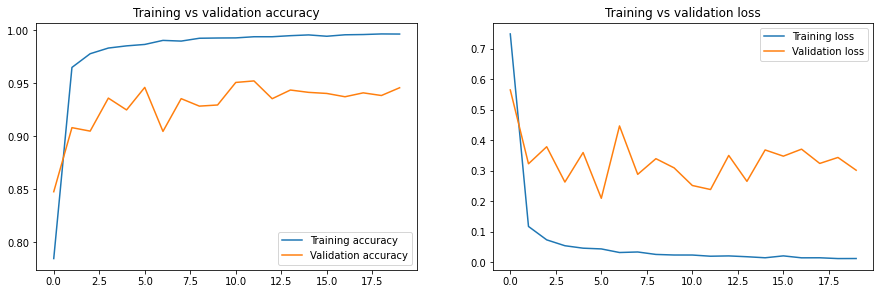

In [16]:
accuracy = history5.history['accuracy']
val_accuracy  = history5.history['val_accuracy']

loss = history5.history['loss']
val_loss = history5.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()


In [17]:
pred = model.predict(tf.convert_to_tensor(test_data))

In [18]:
pred

array([[1.0000000e+00, 5.0431186e-19, 7.2583522e-19, ..., 1.4306769e-13,
        5.1306495e-20, 1.8629521e-14],
       [1.0000000e+00, 2.4061344e-37, 0.0000000e+00, ..., 6.9989748e-28,
        8.1911810e-37, 1.1928125e-25],
       [1.0000000e+00, 7.9086012e-38, 0.0000000e+00, ..., 8.1826302e-28,
        4.7777434e-38, 5.7233900e-28],
       ...,
       [0.0000000e+00, 5.6920493e-31, 9.5067415e-33, ..., 1.2626948e-33,
        1.3409022e-30, 1.3677873e-30],
       [1.7086278e-37, 2.3302657e-21, 1.5990240e-25, ..., 4.3555064e-27,
        2.8181551e-24, 4.7680523e-25],
       [0.0000000e+00, 9.4871783e-33, 8.9758405e-33, ..., 0.0000000e+00,
        3.4534606e-36, 1.4049075e-34]], dtype=float32)

In [19]:
pred_1 = np.argmax(pred, axis = 1)
pred_1

array([ 0,  0,  0, ..., 33, 33, 33])

In [20]:
labels_class = dict([(key, value) for key, value in labels.items()])
labels_class

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 